In [1]:
import os, sys
os.chdir('..')
sys.path.append(os.path.abspath(f"{os.getcwd()}"))

from src.models.utils import read_jsonl

In [5]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [14]:
labels = [i.get('label') for i in read_jsonl('data/raw/example03.jsonl')]
pred = [i.get('pred') for i in read_jsonl('data/predict/example03.jsonl/few_shot_with_reason_8_gpt-3.5-turbo-1106.jsonl')]
classification_report(labels, pred)

/Users/jackyyeh/Library/Caches/pypoetry/virtualenvs/epu-denoise-oYDXtRpX-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackyyeh/Library/Caches/pypoetry/virtualenvs/epu-denoise-oYDXtRpX-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackyyeh/Library/Caches/pypoetry/virtualenvs/epu-denoise-oYDXtRpX-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

'              precision    recall  f1-score   support\n\n          -1       0.00      0.00      0.00         0\n           0       0.80      0.67      0.73      4170\n           1       0.61      0.76      0.68      2905\n\n    accuracy                           0.71      7075\n   macro avg       0.47      0.48      0.47      7075\nweighted avg       0.72      0.71      0.71      7075\n'

In [22]:
k = 0
for id, i in enumerate(pred):
    if i!=0 and i!= 1:
        print(id)
k

6656


0

In [24]:
pred.pop(6656)

-1

In [26]:
labels.pop(6656)

0

In [28]:
classification_report(labels, pred, output_dict=True)

{'0': {'precision': 0.799023830031582,
  'recall': 0.6675461741424802,
  'f1-score': 0.7273915316257188,
  'support': 4169.0},
 '1': {'precision': 0.6140350877192983,
  'recall': 0.7590361445783133,
  'f1-score': 0.6788793103448276,
  'support': 2905.0},
 'accuracy': 0.7051173310715295,
 'macro avg': {'precision': 0.70652945887544,
  'recall': 0.7132911593603968,
  'f1-score': 0.7031354209852732,
  'support': 7074.0},
 'weighted avg': {'precision': 0.7230565842841712,
  'recall': 0.7051173310715295,
  'f1-score': 0.7074695634576401,
  'support': 7074.0}}

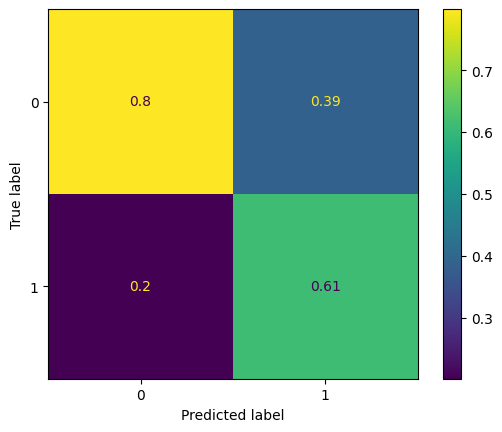

In [35]:
cm = confusion_matrix(labels, pred, normalize="pred")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [33]:
import matplotlib.pyplot as plt

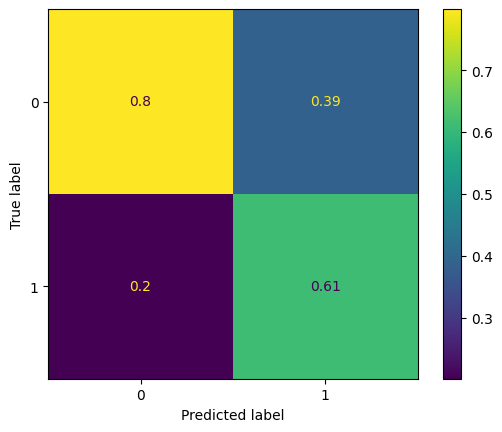

In [37]:
disp.plot()
plt.savefig("/Users/jackyyeh/github/epu_denoise/mlruns/721321918011266623/0b10335b4f2f4579808e1992e5bc2068/artifacts/confustion_matrix.png")